In [1]:
# Bottle Testing 
# ICMS Modelling week, Edinburgh, May 1-4, 2017
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np


In [2]:
## Intrdouction
# Let $N(t)$ be the number of helium molecules in the
# chamber at time $t$.
# The governing differential equation for the model 
# is:
# $$ \frac{dN}{dt} = \dot{N}_{in} - \dot{N}_{out}. $$
# We can then assume that $\dot{N}_{in} = A_k$, for the 
# $k^{th}$ bottle while the term $\dot{N}_{out}$ 
# is proportional to the nubmer of molecules
# already present in the chamber, i.e.,
# $$ \dot{N}_{out} = \alpha N. $$

## 
# The rate at spectormeter determines $a$ hence is
# independent of the bottle. The only term that 
# depends on the $k^{th}$ bottle is $A_k$. Now let's look
# at a _bad_ bottle. For a bad bottle, $A_k$ which 
# is our proxy for the total leaky area on the bottle 
# is going to be larger than a _good_ bottle.


##
# This gives the solution, 
# $$ N_k(t) = \frac{A_k}{\alpha}(1-e^{-\alpha t}), $$
# where we have added the subscript $k$ to $N_k$ to
# express the number of Helium molecules corresponding 
# to the $k^{th}$ bottle.

## A simple noise model
# As expected, the actual observed data has some noise. 
# If we assume additive Gaussian noise, we can model the
# $j^{th}$ observation $y_{kj}$ of the of the $k^{th}$
# bottle as
# $$ y_{kj} = N_{kj} + \epsilon_j, \quad j = 1, 2, \cdots, n, $$
# where $N_{kj} := N_{k}(j\Delta t)$ such that 
# $n \Delta t = T$ and $n$ is the number of observatios in 
# the interval $[0, T]$. Finally, 
# $\{\epsilon_j\}$ is a sequce off iid, zero mean 
# Gaussian random variables with 
# constant variance. Using the expression for $N_k$, we 
# can write our model as 
# $$ y_{kj} = \frac{A_k}{\alpha}(1-e^{-\alpha j\Delta t}) + \epsilon_j, \quad j = 1, 2, \cdots, n, $$
# Let us now write some code to simulate this 
# model.


In [3]:
Ak = 1;      # Leakiness parameter
a = 1;       # this is our alpha
n = 200;     # no. of samples
T = 4;       # the final time
dt = T/n;    # time step

In [4]:
# Based on these parameters, we define a 
# discrete sampling grid and sample the 
# original function $N_k(t)$.
# Note that we are starting from 
# dt, not zero.
t = np.linspace(dt, T, num=n, endpoint=True)
Nk = Ak * ( 1 - np.exp(-a*t)); 

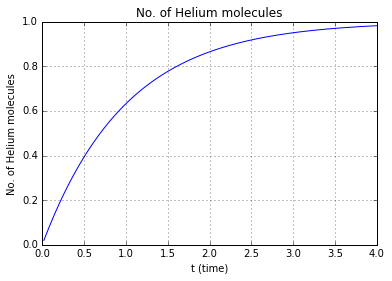

In [5]:
plt.plot(t, Nk)
plt.grid('on')
plt.xlabel('t (time)')
plt.ylabel('No. of Helium molecules')
plt.hold ('on')
plt.title('No. of Helium molecules')

In [6]:
##
# We then construct a noise and add
# it to $N_k$ to form the observations.
e = .05*np.random.randn(len(t));
yk = Nk + e;



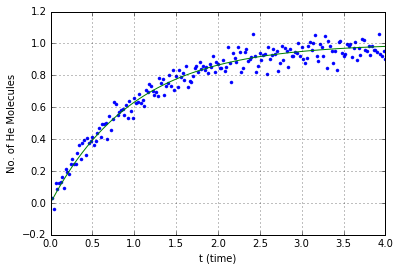

In [7]:
##
# We can plot these observations
# on top of the function
# $N_k(t)$.
plt.plot(t, yk, '.')
plt.grid('on')
plt.hold('on')
plt.plot(t, Nk)
plt.hold('off')
plt.xlabel('t (time)')
plt.ylabel('No. of He Molecules')


In [8]:
# Let us now set the total number of bottles.
N = 100000;

# Actual good bottles
pg = .996; 
Ng = round(N*pg);

##
# Actual bad bottles
pb = 1 - pg;
Nb = round(N*pb);
##
# Readjust the total number of bottles to make sure
# that
N = Ng + Nb;

In [9]:
## Data Generation
# To generate the data, we assume that 
# good bottles are cnetered at $\mu_g$ with 
# standard deviation $\sigma_g$ while 
# the basd bottles are cnetered at $\mu_b$ 
# with standard deviation $\sigma_b$ and 
mu = .9        # mean of bottle population
sigma = .04    # spread of bottle
Ak = np.sort(mu + sigma * np.random.randn(N))
Ak_min = Ak[0]
Ak_max = Ak[-1]
Ag = Ak[0:Ng]
Ab = Ak[Ng:]
A_threshold = Ak[Ng-1];

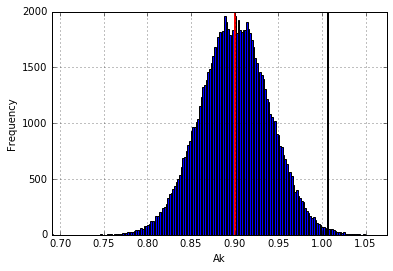

In [10]:
plt.hist(Ak, bins=200);
plt.hold('on')
plt.xlim([Ak_min, Ak_max])
plt.grid('on')
plt.plot([mu, mu], [0, 2000], '-r', linewidth=2)
plt.plot([A_threshold, A_threshold], [0, 2000], '-k', linewidth=2)
plt.xlabel('Ak')
plt.ylabel('Frequency')


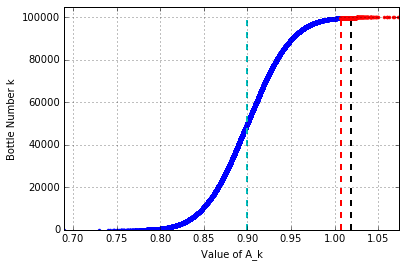

In [11]:
##
# Another plot of the values of $A_k$ 
plt.plot(Ag, np.r_[0:Ng],'.b')
ug = np.mean(Ag)
ub = np.mean(Ab)
plt.hold('on')
plt.grid('on')
plt.plot([ug, ug], [0, len(Ak)], '--c', linewidth=2)
plt.plot([ub, ub], [0, len(Ak)], '--k', linewidth=2)
plt.plot([A_threshold, A_threshold], [0, len(Ak)], '--r', linewidth=2)
plt.plot(Ab, Ng + np.r_[0:len(Ab)], '.r', 10)
plt.hold('off')
plt.xlim([Ak_min, Ak_max])
plt.ylim([0, 1.05*N])
plt.ylabel('Bottle Number k')
plt.xlabel('Value of A_k')


In [12]:
## Making the data matrix
# To form the data matrix, we use
# an outer product of the vector of 
# values of $A_k$ with the discrete
# vector $N_0$, which we define below.
a = 1;
N_0 = 1/a*(1-np.exp(-a*t))
data = np.outer(Ak, N_0)

In [13]:
## Adding noise to the model
# We add Gaussian noise to the data
# with a particular variance to 
# get roughly $8$% rejection rate
# under the criterion of single 
# overshoot from the threshold. 
s = .02;
data = data + s*np.random.randn(data.shape[0], data.shape[1])

In [14]:
##
# Rejection rats is $8$%.
max_vals = np.sort(data.max(1))
pr = .08
Q = max_vals[round(N*(1-pr))-1]

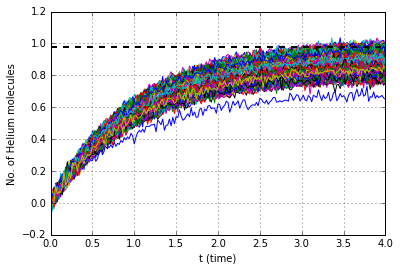

In [15]:
##
# This is what the data looks like:
plt.plot(t, data[100*np.random.permutation(int(np.floor(N/100.0))), :].transpose());
plt.hold('on')
plt.grid('on')
plt.plot([0, T], [Q, Q], '--k', linewidth=2)
plt.xlabel('t (time)')
plt.ylabel('No. of Helium molecules')
plt.hold('off')


In [16]:
## Extract Rejected bottles
# From this data, we can extract
# bottle which are rejected
# on the original criterion of 
# overshooting from the threshold.
rejected_bottles = np.where(data.max(1) > Q)[0]
rejected_data = data[rejected_bottles, :]
rejected_A = Ak[rejected_bottles]

In [17]:
##
# From the data we extract those bottles which have been 
# rejected.
print('No. of bottles rejected = %d' % len(rejected_bottles))
print('No. of bad bottles manufactured = %d' % Nb)
print('No. of bad bottles rejected = %d' % np.sum(rejected_bottles>=Ng))


No. of bottles rejected = 8000
No. of bad bottles manufactured = 400
No. of bad bottles rejected = 400


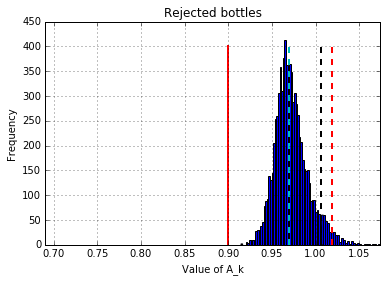

In [18]:
##
# Let's take a look at thier data values.
# $95$% of these are actually good bottles
# and only $5$% are bad.
r1 = rejected_bottles[rejected_bottles < Ng]
r2 = rejected_bottles[rejected_bottles >= Ng]
plt.hist(Ak[r1], 50);
plt.hold('on')
plt.hist(Ak[r2], bins=30);
plt.grid('on')
plt.plot([A_threshold, A_threshold], [0, 400], '--k', linewidth=2)
uu = np.mean(Ak[r1])
plt.plot([uu, uu], [0, 400], '--c', linewidth=2)
uu = np.mean(Ak[r2])
plt.plot([uu, uu], [0, 400], '--r', linewidth=2)
plt.plot([mu, mu], [0, 400], '-r', linewidth=2)
plt.xlabel('Value of A_k')
plt.ylabel('Frequency')
plt.xlim([Ak_min, Ak_max])
plt.title('Rejected bottles')
plt.hold('off')


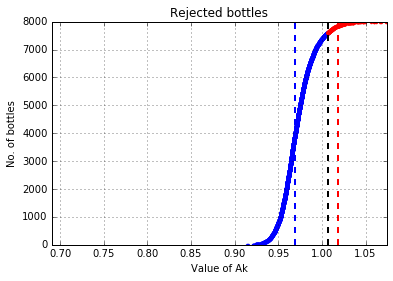

In [19]:
plt.plot(Ak[r1], np.arange(len(r1)), '.b')
plt.hold('on')
plt.plot(Ak[r2], len(r1) + np.arange(len(r2)), '.r')
yLims = [0, len(r1) + len(r2)]
plt.plot([A_threshold, A_threshold], yLims, '--k', linewidth=2)
ug_m = np.mean(Ak[r1])
ub_m = np.mean(Ak[r2])
plt.plot([ug_m, ug_m], yLims, '--b', linewidth=2)
plt.plot([ub_m, ub_m], yLims, '--r', linewidth=2)
plt.grid('on')
plt.hold('off')
plt.xlim([Ak_min, Ak_max])
plt.ylim(yLims)
plt.title('Rejected bottles')
plt.ylabel('No. of bottles')
plt.xlabel('Value of Ak')

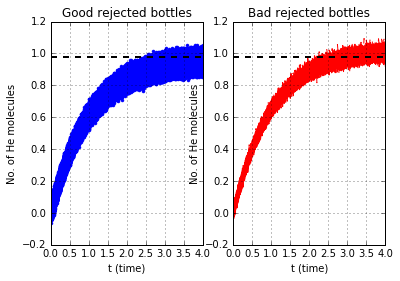

In [20]:
plt.subplot(1, 2, 1)
plt.plot(t, data[r1,:].transpose(), '.b')
plt.hold('on')
plt.title('Good rejected bottles')
plt.grid('on')
plt.plot([0, T], [Q, Q], '--k', linewidth=2)
plt.xlabel('t (time)')
plt.ylabel('No. of He molecules')
plt.hold('off')
plt.subplot(1, 2, 2)
plt.plot(t, data[r2,:].transpose(), '--r')
plt.hold('on')
plt.title('Bad rejected bottles')
plt.grid('on') 
plt.plot([0, T], [Q, Q], '--k', linewidth=2)
plt.xlabel('t (time)')
plt.ylabel('No. of He molecules')
plt.hold('off')

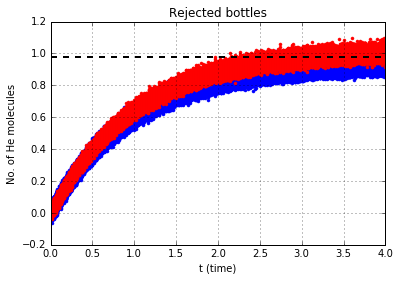

In [21]:
plt.plot(t, data[r1,:].transpose(), '.b')
plt.hold('on')
plt.plot(t, data[r2,:].transpose(), '.r')
plt.title('Rejected bottles')
plt.grid('on') 
plt.plot([0, T], [Q, Q], '--k', linewidth=2)
plt.xlabel('t (time)')
plt.ylabel('No. of He molecules')
plt.hold('off')



In [22]:
Ahat_rejected = a * rejected_data/N_0

In [23]:
Ngr = sum(rejected_bottles < Ng)
Nbr = len(rejected_bottles) - Ngr

A_mean = Ahat_rejected.mean(1)
new_reject_index = A_mean > A_threshold*.99
new_reject_bottles = rejected_bottles[new_reject_index];
new_accept_bottles = rejected_bottles[np.logical_not(new_reject_index)]


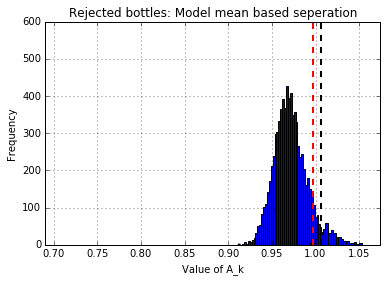

In [24]:
plt.hist(A_mean[:Ngr], bins=50);
plt.hold('on')
plt.hist(A_mean[Ngr:], bins=30);
plt.grid('on')
plt.plot([A_threshold, A_threshold], [0, 600], '--k', linewidth=2)
plt.plot([0.99*A_threshold, 0.99*A_threshold], [0, 600], '--r', linewidth=2)
plt.xlabel('Value of A_k')
plt.ylabel('Frequency')
plt.xlim([Ak_min, Ak_max])
plt.title('Rejected bottles: Model mean based seperation')
plt.hold('off')



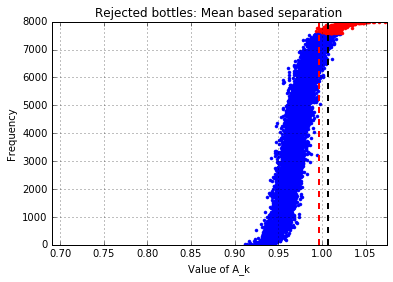

In [25]:
plt.plot(A_mean[:Ngr], np.r_[:Ngr], '.b')
plt.hold('on')
plt.plot(A_mean[Ngr:], np.r_[Ngr:len(A_mean)], '.r')
plt.grid('on')
plt.plot([A_threshold, A_threshold], [0, len(A_mean)], '--k', linewidth=2)
plt.plot([0.99*A_threshold, 0.99*A_threshold], [0, len(A_mean)], '--r', linewidth=2)
plt.xlabel('Value of A_k')
plt.ylabel('Frequency')
plt.xlim([Ak_min, Ak_max])
plt.title('Rejected bottles: Mean based separation')
plt.hold('off')

In [26]:
## 
# Print the results
print('Total bottles originally rejected = %d' % len(rejected_bottles))
print('Total bottles rejected after method 1 = %d' % sum(new_reject_index))
print('New rejection rate due to method 1 = %.2f%%' % (sum(new_reject_index)/(1.0*N)*100))
print('Total bad bottles = %d' % Nb)
good_rejected = new_reject_bottles[new_reject_bottles < Ng]
bad_rejected =  new_reject_bottles[new_reject_bottles >= Ng]
good_accepted = new_accept_bottles[new_accept_bottles < Ng]
bad_accepted = new_accept_bottles[new_accept_bottles >= Ng]
print('Bad bottles rejected = %d' % len(bad_rejected))
print('Bad bottles accepted = %d' % len(bad_accepted))
print('False negatives due to method 1 = %.2f%%' % (len(bad_accepted)/Nb*100))
print('Good bottles rejected = %d' % len(good_rejected))
print('Good bottles accepted = %d' % len(good_accepted))



Total bottles originally rejected = 8000
Total bottles rejected after method 1 = 829
New rejection rate due to method 1 = 0.83%
Total bad bottles = 400
Bad bottles rejected = 396
Bad bottles accepted = 4
False negatives due to method 1 = 1.00%
Good bottles rejected = 433
Good bottles accepted = 7167


In [27]:
## Least-Squares solution
# It can be shown that the least-squares 
# solution boils down to the following
# line of code.
Als = a * np.dot(rejected_data, N_0)/np.dot(N_0, N_0)

## 
# The criterion for acceptnce or rejcection
# is again the same. Simply look at the 
# distance of $A_k$ approximation computed this time 
# via the least-squares method from the 
# threshold. (Use slightly loosened threshold).

new_reject_index = Als > A_threshold*.99
new_reject_bottles = rejected_bottles[new_reject_index];
new_accept_bottles = rejected_bottles[np.logical_not(new_reject_index)]



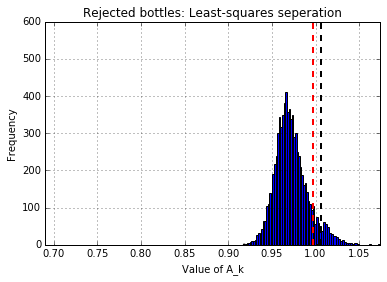

In [28]:
plt.hist(Als[:Ngr], bins=50);
plt.hold('on')
plt.hist(Als[Ngr:], bins=30);
plt.grid('on')
plt.plot([A_threshold, A_threshold], [0, 600], '--k', linewidth=2)
plt.plot([0.99*A_threshold, 0.99*A_threshold], [0, 600], '--r', linewidth=2)
plt.xlabel('Value of A_k')
plt.ylabel('Frequency')
plt.xlim([Ak_min, Ak_max])
plt.title('Rejected bottles: Least-squares seperation')
plt.hold('off')


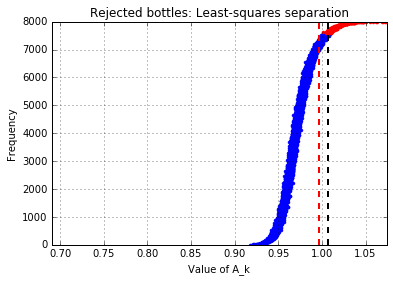

In [29]:
plt.plot(Als[:Ngr], np.r_[:Ngr], '.b')
plt.hold('on')
plt.plot(Als[Ngr:], np.r_[Ngr:len(Als)], '.r')
plt.grid('on')
plt.plot([A_threshold, A_threshold], [0, len(Als)], '--k', linewidth=2)
plt.plot([0.99*A_threshold, 0.99*A_threshold], [0, len(Als)], '--r', linewidth=2)
plt.xlabel('Value of A_k')
plt.ylabel('Frequency')
plt.xlim([Ak_min, Ak_max])
plt.title('Rejected bottles: Least-squares separation')
plt.hold('off')

In [30]:
## 
# Print the results
print('Total bottles originally rejected = %d' % len(rejected_bottles))
print('Total bottles rejected after method 1 = %d' % sum(new_reject_index))
print('New rejection rate due to method 1 = %.2f%%' % (sum(new_reject_index)/(1.0*N)*100))
print('Total bad bottles = %d' % Nb)
good_rejected = new_reject_bottles[new_reject_bottles < Ng]
bad_rejected =  new_reject_bottles[new_reject_bottles >= Ng]
good_accepted = new_accept_bottles[new_accept_bottles < Ng]
bad_accepted = new_accept_bottles[new_accept_bottles >= Ng]
print('Bad bottles rejected = %d' % len(bad_rejected))
print('Bad bottles accepted = %d' % len(bad_accepted))
print('False negatives due to method 1 = %.2f%%' % (len(bad_accepted)/Nb*100))
print('Good bottles rejected = %d' % len(good_rejected))
print('Good bottles accepted = %d' % len(good_accepted))


Total bottles originally rejected = 8000
Total bottles rejected after method 1 = 781
New rejection rate due to method 1 = 0.78%
Total bad bottles = 400
Bad bottles rejected = 400
Bad bottles accepted = 0
False negatives due to method 1 = 0.00%
Good bottles rejected = 381
Good bottles accepted = 7219
